<font size="18">Automatically Solving Sudokus and Meta Sudokus</font>

In [1]:
# set this notebook to use a large part of the browser window width
from IPython.core.display import HTML, display
display(HTML("<style>.container { width:80% !important; }</style>"))

# The well known Sudoku Puzzle

## Introduction

The Sudoku version played on a 9 x 9 squares board, is a well known puzzle game. 
The goal of the puzzle is for the player to put a digit from 1 to 9 in each free square,
so that:
    (a) in every row of 9 squares, no digit occurs more than once
    (b) in every column of 9 squares, no digit occurs more than once
    (c) in every marked 3x3 subsquare, no digit occurs more than once.
A given 9 * 9 Sudoku puzzle typically contains some squares that already contain a number from 1 to 9.
An example Sudoku challenge, taken from [1] is:

<html>
<head>
  <style>
  table { border-collapse: collapse; font-family: Calibri, sans-serif; }
  colgroup, tbody { border: solid medium; }
  td { border: solid thin; height: 1.4em; width: 1.4em; text-align: center; padding: 0; }
  </style>
  <title></title>
</head>
<body>
  <table>
    <caption>
      A standard Sudoku challenge
    </caption>
    <colgroup>
      <col>
      <col>
      <col>
    </colgroup>
    <colgroup>
      <col>
      <col>
      <col>
    </colgroup>
    <colgroup>
      <col>
      <col>
      <col>
    </colgroup>
    <tbody>
      <tr>
        <td>1</td>
        <td></td>
        <td>3</td>
        <td>6</td>
        <td></td>
        <td>4</td>
        <td>7</td>
        <td></td>
        <td>9</td>
      </tr>
      <tr>
        <td></td>
        <td>2</td>
        <td></td>
        <td></td>
        <td>9</td>
        <td></td>
        <td></td>
        <td>1</td>
        <td></td>
      </tr>
      <tr>
        <td>7</td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td>6</td>
      </tr>
    </tbody>
    <tbody>
      <tr>
        <td>2</td>
        <td></td>
        <td>4</td>
        <td></td>
        <td>3</td>
        <td></td>
        <td>9</td>
        <td></td>
        <td>8</td>
      </tr>
      <tr>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
      </tr>
      <tr>
        <td>5</td>
        <td></td>
        <td></td>
        <td>9</td>
        <td></td>
        <td>7</td>
        <td></td>
        <td></td>
        <td>1</td>
      </tr>
    </tbody>
    <tbody>
      <tr>
        <td>6</td>
        <td></td>
        <td></td>
        <td></td>
        <td>5</td>
        <td></td>
        <td></td>
        <td></td>
        <td>2</td>
      </tr>
      <tr>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td>7</td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
      </tr>
      <tr>
        <td>9</td>
        <td></td>
        <td></td>
        <td>8</td>
        <td></td>
        <td>2</td>
        <td></td>
        <td></td>
        <td>5</td>
      </tr>
    </tbody>
  </table>
</body>
</html>

## Sudoku Model Formulation

A Sudoku is a quintessential problem to formulate as an Integer Linear Programming (ILP) problem. The basic version is also easy to solve. Its mathematical declarative model can be stated as follows.

### Sets and Indices


$D \in \mathbb{N}$: Meta Sudoku dimension of the Sudoku board.

$\overline{n} = D^{2}$: the maximum number to be filled out in the Sudoku. The minimum number is always 1.

$r \in R$: indices for the row of the Sudoku board, starting at 0

$c \in C$: indices for the column of the Sudoku board, starting at 0

$n \in N$: indices for the allowable number set of the Sudoku board, starting at 0.

$n \in N^{+}$: indices for the allowable number set of the Sudoku board, starting at 1.


### Parameters 

$f_{r, c}: R \times C \mapsto N^+$: Specifies the already decided - fixed - numbers for some board squares in the Sudoku problem definition. 
f_{r,c,n} is 1 if n is the number decided for row r and column c of the Sudoku board. Typically, not all combinations of r and c are be specified.


### Decision Variables
$b_{r, c, n} \in \{0, 1\}$: This variable is equal to 1, if we decide to put in row r and column c the number n. Otherwise, the decision variable is equal to zero.

$n_{r, c} \in \{0, \overline{n}\}$: This variable is equal to n, if we decide to put in row r and column c the number n. Otherwise, the decision variable is equal to zero.
They formulate a more direct way to represent the solution than the b variables. Of course b and n cannot be decided upon separately so there will be binding constraints between them.

### Objective Function

Since Sudoku is a feasibility problem only, there is no concept of optimality here and so no objective function to be minimized or maximized needs to be specified.

### Constraints 

- **Square-wise constraints **. Each square of the Sudoku board holds exactly 1 number $n \in N^+$.

\begin{equation}
\sum_{n \in N} b_{r, c, n} = 1 \quad \forall (r,c) \in R \times C
\tag{1}
\end{equation}

- **Row-wise constraints **. For each row $r$, ensure that each number $n \in N^+$ occurs exactly once.

\begin{equation}
\sum_{c \in C} b_{r, c, n} = 1 \quad \forall (r,n) \in R \times N
\tag{2}
\end{equation}

- **Columns-wise constraints **. For each column $c$, ensure that each number $n \in N^+$ occurs exactly once.

\begin{equation}
\sum_{r \in R} b_{r, c, n} = 1 \quad \forall (c,n) \in C \times N
\tag{3}
\end{equation}

- **SubBoard-wise constraints **. For each $D*D$-sized subboard $n$, ensure that each number $n \in N^+$ occurs exactly once.

\begin{equation}
\sum_{(r\_, c\_) \in R \times C} b_{r*D+r\_, c*D+c\_, n} = 1 \quad \forall (r, c, n) \in R \times C\times  N
\tag{4}
\end{equation}

Note that the indices of b here are still relatively simple expressions thanks to the fact of having offset 0 for rows and columns.

- **Preset squares constraints **.

\begin{equation}
\sum_{n \in N} b_{r, c, n} \cdot (n+1)= f_{r,c} \quad \forall (r,c) \in dom(f_{r,n})
\tag{5}
\end{equation}

- **Linking constraints between binary and numeric decision variables **.

\begin{equation}
\sum_{n \in N} b_{r, c, n} \cdot (n+1)= n_{r,c} \quad \forall (r,c) \in R \times C
\tag{6}
\end{equation}

Note that the n+1 in the two last equations above occurs because the set N is offset 0 based while the function f as well as the variables n and the set $N^+$ are all offset 1 based.

# General Implementation in Python3 with gurobipy API to the Gurobi MILP Solver

## Store a Sudoku Problem specification in a Json File

We store the Sudoku problem formulation in a json file, like this one.

In [2]:
cat 'sudokuDim3.json'

{
  "dim": 3,
  "fixed": {
    "1": {
      "1": "5",
      "2": "3",
      "5": "7"
    },
    "2": {
      "1": "6",
      "4": "1",
      "5": "9",
      "6": "5"
    },
    "3": {
      "2": "9",
      "3": "8",
      "8": "6"
    },
    "4": {
      "1": "8",
      "5": "6",
      "9": "3"
    },
    "5": {
      "1": "4",
      "4": "8",
      "6": "3",
      "9": "1"
    },
    "6": {
      "1": "7",
      "5": "2",
      "9": "6"
    },
    "7": {
      "2": "6",
      "7": "2",
      "8": "8"
    },
    "8": {
      "4": "4",
      "5": "1",
      "6": "9",
      "9": "5"
    },
    "9": {
      "5": "8",
      "8": "7",
      "9": "9"
    }
  },
  "solved":
  {
  }
}


The "dim" field indicates the dimension of the Sudoku which is in the most common case equal to 3. The "fixed" field prefixes a dictionary with first key being the Sudoku board row, second key being the board column and the value being the number that is already decided for that row and column of the board.

## Read a Sudoku Problem from a Json File

We then write a function to read the sudoku from such a json file, perform some checks at the same time and return us the dimension "dim" and the "fixed" data structure as a python dictionary.

In [3]:
import json

def read_sudoku_from_json_file_and_check(file_name):
    verbose = 0  # set to 1 to see more output

    sudoku_json = json.load(open(file_name))

    # do some basic checks to see we have all the information needed and none other
    errors = ''
     
    # read dim(ension) field
    dim = int(sudoku_json["dim"])
    if verbose > 0: 
        print("dim = {:d}".format(dim))
    max_nr = pow(dim, 2)
    if verbose > 0: 
        print("max_nr = {:d}".format(max_nr) if (verbose>0) else '')
    nrs = list(range(1, max_nr+1))
    nrs_str = '[' + ','.join([str(nr) for nr in nrs]) + ']'
    if verbose > 0: 
        print(nrs_str if (verbose>0) else '')

    # read fixed part
    fixed = sudoku_json["fixed"]
    for row in fixed:
        r = int(row)
        if r not in nrs:
            errors += \
            'row index number should be in {:s} but is {:d}.\n'.\
            format(nrs_str, r)
        for col in fixed[row]:
            c = int(col)
            if c not in nrs:
                errors += 'column index number should be in {:s} but is {:d}.\n'.\
                format(nrs_str, c)
            num = fixed[row][col]
            n = int(num)
            if n not in nrs:
                errors += 'square[{:d}][{:d}] number should be in {:s} but is {:d}.\n'.\
                format(r, c, nrs_str, n)

    print('I have read a ' + ('faulty' if (errors!='') else 'valid') +\
          ' MetaSudoku problem description of dimension {:d}.'.format(dim) + '\n' + errors)
    return dim, fixed
    
dim, fixed = read_sudoku_from_json_file_and_check('sudokuDim3.json')

I have read a valid MetaSudoku problem description of dimension 3.



## Solve a Sudoku Problem

The following function solves the problem using the solver Gurobi.

In [4]:
# tested with Python 3.7.6 & Gurobi 9
from gurobipy import *

def solve_sudoku_with_gurobi(dim, fixed):

    verbose = 0
    
    n_rows = n_cols = n_nums = dim * dim
    n_subs = dim

    rows = cols = nums = list(range(n_rows))
    subs  = list(range(n_subs))

    if verbose > 0:
        print(rows); print(cols); print(nums)
        print(subs)
    
    m = Model()

    # define the binary core variables
    bin_vars = m.addVars(n_rows, n_cols, n_nums, vtype=GRB.BINARY, name='bin')

    # define the basic Constraints
    for r in rows:
        for c in cols:
            constr_name = \
            'uniqueNumberPerSquare_r{:d}_c{:d}'.format(r, c)
            m.addConstr(quicksum(bin_vars[r,c,n] for n in nums) == 1, 
                        constr_name)

    for r in rows:
        for n in nums:
            constr_name = \
            'noDoublesInRow_r{:d}_n{:d}'.format(r, n)
            m.addConstr(quicksum(bin_vars[r,c,n] for c in cols) == 1, 
                        constr_name)

    for c in cols:
        for n in nums:
            constr_name = \
            'noDoublesInCol_c{:d}_n{:d}'.format(c, n)
            m.addConstr(quicksum(bin_vars[r,c,n] for r in rows) == 1, 
                        constr_name)

    import itertools
    combos = list(itertools.product(*[subs, subs]))
    if verbose > 0:
        print(combos)

    for r in subs:
        for c in subs:
            for n in nums:
                constr_name = \
                    'noDoublesInSubboard_r{:d}_c{:d}_n{:d}'.format(r, c, n)
                m.addConstr(quicksum(bin_vars[r*dim+r_,c*dim+c_,n] \
                                     for r_,c_ in combos) == 1, constr_name)

    # define the numeric helper variables so that the board 
    # can easily be displayed:
    num_vars = m.addVars(n_rows, n_cols, vtype=GRB.INTEGER, 
                         lb=1, ub=n_nums, name='num') 
    # note that the lower bound is 1 and not 0.     

    impose_pre_fix_squares = True
    if impose_pre_fix_squares:
        # initial squares, fixed
        for r_str in fixed:
            r = int(r_str)-1
            for c_str in fixed[r_str]:
                c = int(c_str)-1
                f = int(fixed[r_str][c_str])
                constr_name = 'binFixRelation_r{:d}_c{:d}_f{:d}'.format(r, c, f)
                m.addConstr(quicksum(bin_vars[r,c,n] * (n+1) for n in nums)\
                            == f, constr_name)    
    
    # define the constraints linking binary and numeric constraints
    for r in rows:
        for c in cols:
            constr_name = 'binNumRelation_r{:d}_c{:d}'.format(r, c)
            m.addConstr(quicksum(bin_vars[r,c,n] * (n+1) for n in nums) \
                        == num_vars[r,c], constr_name)
            # note the n+1 i.o. because of the lower bound 
            # of 1 of the num_vars.

    # optimize the model
    m.optimize()
    
    # retrieve solution
    num_vals = m.getAttr('x', num_vars)
        
    return rows, cols, subs, num_vals

rows, cols, subs, num_vals = solve_sudoku_with_gurobi(dim, fixed)

Using license file /Library/gurobi910/gurobi.lic
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 435 rows, 810 columns and 3996 nonzeros
Model fingerprint: 0x2b46f03d
Variable types: 0 continuous, 810 integer (729 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 9e+00]
  RHS range        [1e+00, 9e+00]
Presolve removed 435 rows and 810 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 16 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


## Display a solved Sudoku problem

The following function generates html code that can be easily displayed in this python notebook.

In [5]:
def display_solution(
    rows, cols, subs, 
    fixed, num_vals, caption, 
    sudoku_table_style="table { border-collapse: collapse; " + \
    "font-family: Calibri, sans-serif; } " + \
    "colgroup, tbody { border: solid thin; } td { td border: solid thin; "\
    "height: 1.4em; width: 1.4em; text-align: center; padding: 0; }\n"):
    
    debug = False
        
    table = '  <table>\n'
    
    table += '    <caption>\n'
    table += '  {:s}\n    '.format(caption)
    table += '    </caption>\n'

    N = len(subs)
    for s1 in subs:
        table += '    <colgroup>\n'
        for s2 in subs:
            table += '        <col>\n'
        table += '    </colgroup>\n'

    for r in rows:
        if (r % N) == 0:
            table += '    <tbody>\n'
        table += '      <tr>\n'
        for c in cols:
            pre = '<td style="color:black;">'
            if str(r+1) in fixed:
                if str(c+1) in fixed[str(r+1)]:
                    pre = '<td style="color:red;">'
            table += '        ' + pre + '{:d} '.format(int(num_vals[(r,c)])) + '</td>\n'
        if (r % N) == N-1:
            table += '    </tbody>\n'

    table += '  </table>'
    
    s = ''
    s += '<html>\n'
    
    s += '<head>\n'
    s += '  <style>\n'
    s += '    ' + sudoku_table_style
    s += '  </style>\n'
    s += '</head>\n'

    s += '<body>\n'
    s += '  ' + table + '\n'
    s += '</body>\n'
    
    s += '</html>'

    if debug:
        print(s)
    else:
        return s if debug else HTML(s)

display_solution(rows, cols, subs, fixed, num_vals, '3x3x3x3 Sudoku')

5,3,4,6,7,8,9,1,2
6,7,2,1,9,5,3,4,8
1,9,8,3,4,2,5,6,7
8,5,9,7,6,1,4,2,3
4,2,6,8,5,3,7,9,1
7,1,3,9,2,4,8,5,6
9,6,1,5,3,7,2,8,4
2,8,7,4,1,9,6,3,5
3,4,5,2,8,6,1,7,9


## Write the solution back to a Json File

You may have spotted that our input file 'sudokuDim3.json', specifying the Sudoku problem, contained an empty subdictionary with key "solved" and that it was not read at all by the function 'read_sudoku_from_json_file_and_check'. This is of course a placeholder for the solution to be written back. Let's write a function to do that. Note that we want to keep the separation between the fixed and the solved squares in the output file.

In [6]:
def write_sudoku_solution_to_json_file(dim, fixed, num_vals, output_file_name):
    d = {}
    d["dim"] = dim
    d["fixed"] = fixed  # fixed stores keys in row then col and both 
    # in string form already, since we read it from json input
    d["solved"] = {}
    for (row, col) in num_vals:  # num_vals stores row, col keys 
        # as an integer pair 
        #print(row, col)
        row_str = str(row+1)
        col_str = str(col+1)
        if row_str in fixed and col_str in fixed[row_str]:
            # it's part of the fixed squares and will be written 
            # out via d["fixed"]
            pass
        else:
            if not (row_str in d["solved"]):
                d["solved"][row_str]= {}
            d["solved"][row_str][col_str] = int(num_vals[(row,col)])
    with open(output_file_name, 'w') as outfile:
        json.dump(d, outfile, indent=2)
        
write_sudoku_solution_to_json_file(dim, fixed, num_vals, 
                                   'sudokuDim3_solved.json')

In [7]:
cat 'sudokuDim3_solved.json'

{
  "dim": 3,
  "fixed": {
    "1": {
      "1": "5",
      "2": "3",
      "5": "7"
    },
    "2": {
      "1": "6",
      "4": "1",
      "5": "9",
      "6": "5"
    },
    "3": {
      "2": "9",
      "3": "8",
      "8": "6"
    },
    "4": {
      "1": "8",
      "5": "6",
      "9": "3"
    },
    "5": {
      "1": "4",
      "4": "8",
      "6": "3",
      "9": "1"
    },
    "6": {
      "1": "7",
      "5": "2",
      "9": "6"
    },
    "7": {
      "2": "6",
      "7": "2",
      "8": "8"
    },
    "8": {
      "4": "4",
      "5": "1",
      "6": "9",
      "9": "5"
    },
    "9": {
      "5": "8",
      "8": "7",
      "9": "9"
    }
  },
  "solved": {
    "1": {
      "3": 4,
      "4": 6,
      "6": 8,
      "7": 9,
      "8": 1,
      "9": 2
    },
    "2": {
      "2": 7,
      "3": 2,
      "7": 3,
      "8": 4,
      "9": 8
    },
    "3": {
      "1": 1,
      "4": 3,
      "5": 4,
      "6": 2,
      "7": 5,
      "9": 7
    },
    "4": {
      "2": 5,
      "3

## One function to read, solve, write and display a Sudoku

Taking it all together we can bundle the reading, solving and displaying into one function.

In [8]:
def read_solve_write_display_sudoku(input_file_name, display=True):
    dim, fixed = read_sudoku_from_json_file_and_check(input_file_name)
    rows, cols, subs, num_vals = solve_sudoku_with_gurobi(dim, fixed)
    output_file_name = input_file_name.replace('.json', '_solved.json')
    write_sudoku_solution_to_json_file(dim, fixed, 
                                       num_vals, output_file_name)
    if display:
        html_table = display_solution(
            rows, cols, subs, fixed, num_vals,
            '{:d} x {:d} x {:d} x {:d} Sudoku'.format(dim, dim, 
                                                      dim, dim))
        return html_table

## Fixed point check
The fixed part of this dictionary is of course exactly the same as of the unsolved version in the file 'sudokuDim3.json'. This means we could test that the solved version solves to the same solution. 

In [9]:
read_solve_write_display_sudoku('sudokuDim3_solved.json', 
                                display=False)

I have read a valid MetaSudoku problem description of dimension 3.

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 435 rows, 810 columns and 3996 nonzeros
Model fingerprint: 0x2b46f03d
Variable types: 0 continuous, 810 integer (729 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 9e+00]
  RHS range        [1e+00, 9e+00]
Presolve removed 435 rows and 810 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 16 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


Indeed:

diff sudokuDim3_solved.json sudokuDim3_solved_solved.json

gives no output, meaning the files are identical.

# Meta Sudoku

By the definition of the variable $D$ above, or just by the title of this article, you will have realised that
a Sudoku can be extended to higher values of dim. An example of a Meta Sudoku of dimension 4 is for example.

## Scaling Down

Oh, let's first try to solve smaller Sudokus, like for D=1 and for D=2. That's a good test to see if our code is robust against corner cases.

In [10]:
#read_solve_write_display_sudoku('sudokuDim2.json')
read_solve_write_display_sudoku('sudokuDim2NothingFixed.json')

I have read a valid MetaSudoku problem description of dimension 2.

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 80 rows, 80 columns and 336 nonzeros
Model fingerprint: 0x441d8e97
Variable types: 0 continuous, 80 integer (64 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 4e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 16 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


2,3,4,1
4,1,3,2
1,4,2,3
3,2,1,4


That is easy to check for correctness.

In [11]:
#read_solve_write_display_sudoku('sudokuDim1.json')
read_solve_write_display_sudoku('sudokuDim1NothingFixed.json')

I have read a valid MetaSudoku problem description of dimension 1.

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 5 rows, 2 columns and 6 nonzeros
Model fingerprint: 0xf67e35ff
Variable types: 0 continuous, 2 integer (1 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 0.00 seconds
Thread count was 1 (of 16 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


1


That's fine and the only 1x1 Sudoku around.

In [12]:
#read_solve_write_display_sudoku('sudokuDim0.json')
read_solve_write_display_sudoku('sudokuDim0NothingFixed.json')

I have read a valid MetaSudoku problem description of dimension 0.

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 0 rows, 0 columns and 0 nonzeros
Model fingerprint: 0xf9715da1
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  0.000000000e+00


Even that works! :) That may not surprise you but for example the solver XPRESS, at least for its C++ API in 2016, gave an error if you pass it a problem with 0 variables and zero constraints.

## Scaling Up

Time to scale up now. How about dimension 4?

In [13]:
#read_solve_write_display_sudoku('sudokuDim4.json')
read_solve_write_display_sudoku('sudokuDim4NothingFixed.json')

I have read a valid MetaSudoku problem description of dimension 4.

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1280 rows, 4352 columns and 20736 nonzeros
Model fingerprint: 0xf2d22521
Variable types: 0 continuous, 4352 integer (4096 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 1e+00]
Presolve removed 256 rows and 256 columns
Presolve time: 0.04s
Presolved: 1024 rows, 4096 columns, 16384 nonzeros
Variable types: 0 continuous, 4096 integer (4096 binary)
Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 0.06 seconds
Thread count was 16 (of 16 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%


16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1
12,11,10,9,16,15,14,13,4,3,2,1,8,7,6,5
8,7,6,5,4,3,2,1,16,15,14,13,12,11,10,9
4,3,2,1,8,7,6,5,12,11,10,9,16,15,14,13
15,16,13,14,11,12,9,10,7,8,5,6,3,4,1,2
11,12,9,10,15,16,13,14,3,4,1,2,7,8,5,6
7,8,5,6,3,4,1,2,15,16,13,14,11,12,9,10
3,4,1,2,7,8,5,6,11,12,9,10,15,16,13,14
14,13,16,15,10,9,12,11,6,5,8,7,2,1,4,3
10,9,12,11,14,13,16,15,2,1,4,3,6,5,8,7
6,5,8,7,2,1,4,3,14,13,16,15,10,9,12,11


In [14]:
#read_solve_write_display_sudoku('sudokuDim5.json')
read_solve_write_display_sudoku('sudokuDim5NothingFixed.json')

I have read a valid MetaSudoku problem description of dimension 5.

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3125 rows, 16250 columns and 78750 nonzeros
Model fingerprint: 0xc26fe833
Variable types: 0 continuous, 16250 integer (15625 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 1e+00]
Presolve removed 625 rows and 625 columns
Presolve time: 0.15s
Presolved: 2500 rows, 15625 columns, 62500 nonzeros
Variable types: 0 continuous, 15625 integer (15625 binary)

Root relaxation: objective 0.000000e+00, 8993 iterations, 4.32 seconds
Total elapsed time = 14.70s
Total elapsed time = 24.74s
Total elapsed time = 35.00s
Total elapsed time = 44.52s

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Bes

7,15,23,25,9,1,19,24,6,12,20,3,2,22,13,21,16,18,17,11,5,14,4,10,8
3,24,8,22,19,25,11,9,23,2,10,6,15,21,18,4,14,20,5,1,13,17,7,12,16
12,1,10,6,21,8,4,22,5,20,7,14,19,17,16,3,13,25,15,23,24,18,11,2,9
4,14,13,5,20,17,15,3,16,18,11,12,1,25,24,10,7,9,2,8,23,6,22,21,19
16,2,18,17,11,10,13,7,14,21,5,23,4,9,8,19,12,24,22,6,25,1,15,3,20
23,8,6,4,25,7,22,13,18,16,15,5,20,24,2,14,17,3,11,10,19,21,12,9,1
5,3,24,13,12,9,23,6,4,15,17,10,22,19,25,16,1,21,20,18,14,2,8,11,7
18,7,2,19,17,3,10,14,1,24,23,16,11,13,21,25,22,12,8,9,6,4,20,5,15
1,22,16,9,15,20,25,11,21,5,3,7,8,14,12,2,24,4,6,19,18,13,10,23,17
21,10,11,20,14,12,8,2,17,19,18,9,6,1,4,13,23,15,7,5,3,25,16,24,22
13,11,4,1,18,5,16,25,12,23,6,24,21,7,22,9,10,19,14,20,8,3,17,15,2


In [15]:
#read_solve_write_display_sudoku('sudokuDim6.json')
read_solve_write_display_sudoku('sudokuDim6NothingFixed.json')

I have read a valid MetaSudoku problem description of dimension 6.

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 6480 rows, 47952 columns and 234576 nonzeros
Model fingerprint: 0x735dd1ed
Variable types: 0 continuous, 47952 integer (46656 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 4e+01]
  RHS range        [1e+00, 1e+00]
Presolve removed 1296 rows and 1296 columns
Presolve time: 0.30s
Presolved: 5184 rows, 46656 columns, 186624 nonzeros
Variable types: 0 continuous, 46656 integer (46656 binary)

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
    8562    2.5959319e-04   8.832995e+03   0.000000e+00      5s
   11432    3.3576205e-04   1.116760e+04   0.000000e+00     10s
   13952    3.8279635e-04   2.738870e+03   0.000000e+00     15s
   16312    4.1593421e-04   

1,2,3,4,5,6,7,8,9,10,11,12,24,36,16,18,23,28,35,34,27,21,31,20,15,30,32,22,25,14,29,33,26,17,13,19
21,28,19,32,20,34,14,22,17,3,1,26,29,25,31,15,10,9,12,6,24,16,13,2,5,33,8,4,18,35,11,27,23,36,30,7
35,26,9,36,27,14,5,20,18,30,25,28,6,32,1,3,12,11,33,19,4,7,10,8,31,17,29,23,13,21,15,22,24,16,2,34
24,18,10,33,29,23,15,35,16,32,6,36,20,2,21,34,8,13,17,22,5,9,25,30,26,11,19,28,27,7,1,31,14,3,4,12
12,17,11,31,13,30,19,24,21,2,27,29,4,26,22,33,5,7,23,32,14,36,15,28,6,16,20,3,1,34,18,35,8,25,9,10
7,15,16,22,25,8,23,4,33,31,13,34,14,35,27,17,30,19,26,3,18,1,29,11,12,36,24,2,10,9,21,32,20,5,6,28
26,9,2,6,32,3,4,36,5,8,31,11,33,28,30,19,34,1,14,20,35,27,16,17,23,10,21,29,24,12,25,18,22,13,7,15
15,14,20,35,36,27,29,34,13,1,9,23,21,17,12,8,22,6,10,25,2,3,32,5,28,7,33,18,26,11,19,24,30,4,31,16
23,8,12,16,28,10,18,14,24,35,22,3,9,13,2,25,7,26,21,4,31,29,19,36,30,34,15,32,6,17,33,11,1,27,5,20
18,19,5,17,1,22,25,28,2,15,20,27,32,29,11,10,24,4,30,33,7,12,26,6,3,13,9,31,14,16,34,21,35,8,36,23
33,21,29,34,31,24,10,19,30,26,7,6,16,18,14,35,15,36,8,1,23,13,11,9,4,27,5,20,22,25,3,2,17,28,12,32


In [16]:
#read_solve_write_display_sudoku('sudokuDim7.json')
read_solve_write_display_sudoku('sudokuDim7NothingFixed.json')

I have read a valid MetaSudoku problem description of dimension 7.

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 12005 rows, 120050 columns and 590646 nonzeros
Model fingerprint: 0x5e2655a1
Variable types: 0 continuous, 120050 integer (117649 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 5e+01]
  RHS range        [1e+00, 1e+00]
Presolve removed 2401 rows and 2401 columns
Presolve time: 0.86s
Presolved: 9604 rows, 117649 columns, 470596 nonzeros
Variable types: 0 continuous, 117649 integer (117649 binary)

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
    9881    2.0133642e-04   2.023453e+04   0.000000e+00      5s
   12449    3.1997070e-04   4.671317e+04   0.000000e+00     10s
   14509    3.9074280e-04   2.249337e+04   0.000000e+00     15s
   16099    4.3557638

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,22,23,24
43,44,45,8,17,21,18,25,26,27,28,29,30,31,32,33,34,35,36,37,38,22,23,24,1,40,41,42,5,6,7,9,10,19,20,46,47,48,49,2,3,4,39,13,14,15,11,12,16
32,33,34,35,47,48,49,39,40,41,42,43,44,45,2,3,4,5,6,7,8,11,12,16,36,37,38,46,1,25,26,27,28,29,30,31,22,23,24,13,14,15,9,10,17,18,19,20,21
31,11,12,36,37,38,19,16,17,18,1,47,48,49,25,26,27,28,29,30,39,7,20,13,43,44,45,6,46,14,15,21,22,23,24,8,9,10,32,33,34,35,2,3,4,40,41,42,5
9,10,16,13,22,23,24,36,37,38,46,19,20,21,31,47,48,49,40,41,42,14,15,18,3,4,39,5,2,43,44,45,11,12,17,1,25,26,27,28,29,30,32,33,34,35,6,7,8
39,40,41,42,20,14,15,32,33,34,35,22,23,24,46,43,44,45,9,10,11,19,17,21,47,48,49,2,31,3,4,8,16,18,13,36,37,38,5,6,7,12,1,25,26,27,28,29,30
25,26,27,28,29,30,46,2,3,4,5,6,7,15,1,12,13,14,22,23,24,8,9,10,32,33,34,35,47,48,49,39,40,41,42,11,16,17,18,19,20,21,31,36,37,38,43,44,45
41,25,26,27,28,29,30,34,38,20,7,17,18,1,16,23,6,36,3,48,31,12,43,47,49,9,4,11,37,2,22,14,45,10,39,44,19,24,15,42,35,5,21,32,40,46,8,13,33
44,18,42,43,23,4,32,28,21,5,48,13,3,8,34,38,14,12,49,40,33,31,10,2,25,1,26,27,7,17,20,19,24,47,35,16,46,45,11,41,39,22,29,30,6,37,15,9,36
21,19,48,16,14,9,34,29,24,45,47,40,33,36,22,11,10,46,13,15,35,6,44,17,30,28,37,7,26,1,27,32,31,38,41,25,3,8,23,49,2,20,12,18,42,4,5,43,39
24,20,13,17,45,33,36,15,23,14,49,2,19,39,9,7,8,30,44,4,37,42,18,46,29,41,21,48,28,34,12,3,6,40,5,26,1,27,43,32,10,31,25,16,11,22,38,35,47


In [17]:
read_solve_write_display_sudoku('sudokuDim8NothingFixed.json')

I have read a valid MetaSudoku problem description of dimension 8.

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 20480 rows, 266240 columns and 1314816 nonzeros
Model fingerprint: 0xb8b9929b
Variable types: 0 continuous, 266240 integer (262144 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 6e+01]
  RHS range        [1e+00, 1e+00]
Presolve removed 4096 rows and 4096 columns
Presolve time: 2.08s
Presolved: 16384 rows, 262144 columns, 1048576 nonzeros
Variable types: 0 continuous, 262144 integer (262144 binary)
Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 2.76 seconds
Thread count was 16 (of 16 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%

64,63,62,61,60,59,58,57,56,55,54,53,52,51,50,49,48,47,46,45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1
56,55,54,53,52,51,50,49,64,63,62,61,60,59,58,57,40,39,38,37,36,35,34,33,48,47,46,45,44,43,42,41,24,23,22,21,20,19,18,17,32,31,30,29,28,27,26,25,8,7,6,5,4,3,2,1,16,15,14,13,12,11,10,9
48,47,46,45,44,43,42,41,40,39,38,37,36,35,34,33,64,63,62,61,60,59,58,57,56,55,54,53,52,51,50,49,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17
40,39,38,37,36,35,34,33,48,47,46,45,44,43,42,41,56,55,54,53,52,51,50,49,64,63,62,61,60,59,58,57,8,7,6,5,4,3,2,1,16,15,14,13,12,11,10,9,24,23,22,21,20,19,18,17,32,31,30,29,28,27,26,25
32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,64,63,62,61,60,59,58,57,56,55,54,53,52,51,50,49,48,47,46,45,44,43,42,41,40,39,38,37,36,35,34,33
24,23,22,21,20,19,18,17,32,31,30,29,28,27,26,25,8,7,6,5,4,3,2,1,16,15,14,13,12,11,10,9,56,55,54,53,52,51,50,49,64,63,62,61,60,59,58,57,40,39,38,37,36,35,34,33,48,47,46,45,44,43,42,41
16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,48,47,46,45,44,43,42,41,40,39,38,37,36,35,34,33,64,63,62,61,60,59,58,57,56,55,54,53,52,51,50,49
8,7,6,5,4,3,2,1,16,15,14,13,12,11,10,9,24,23,22,21,20,19,18,17,32,31,30,29,28,27,26,25,40,39,38,37,36,35,34,33,48,47,46,45,44,43,42,41,56,55,54,53,52,51,50,49,64,63,62,61,60,59,58,57
63,64,61,62,59,60,57,58,55,56,53,54,51,52,49,50,47,48,45,46,43,44,41,42,39,40,37,38,35,36,33,34,31,32,29,30,27,28,25,26,23,24,21,22,19,20,17,18,15,16,13,14,11,12,9,10,7,8,5,6,3,4,1,2
55,56,53,54,51,52,49,50,63,64,61,62,59,60,57,58,39,40,37,38,35,36,33,34,47,48,45,46,43,44,41,42,23,24,21,22,19,20,17,18,31,32,29,30,27,28,25,26,7,8,5,6,3,4,1,2,15,16,13,14,11,12,9,10
47,48,45,46,43,44,41,42,39,40,37,38,35,36,33,34,63,64,61,62,59,60,57,58,55,56,53,54,51,52,49,50,15,16,13,14,11,12,9,10,7,8,5,6,3,4,1,2,31,32,29,30,27,28,25,26,23,24,21,22,19,20,17,18


In [ ]:
read_solve_write_display_sudoku('sudokuDim9NothingFixed.json')

I have read a valid MetaSudoku problem description of dimension 9.

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 32805 rows, 538002 columns and 2663766 nonzeros
Model fingerprint: 0x6caa640c
Variable types: 0 continuous, 538002 integer (531441 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 8e+01]
  RHS range        [1e+00, 1e+00]
Presolve removed 6561 rows and 6561 columns
Presolve time: 4.33s
Presolved: 26244 rows, 531441 columns, 2125764 nonzeros
Variable types: 0 continuous, 531441 integer (531441 binary)

Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 5.07s

Barrier statistics:
 AA' NZ     : 2.068e+06
 Factor NZ  : 6.933e+07 (roughly 800 MBytes of memory)
 Factor Ops : 3.801e+11 (roughly 2 seconds 

  264296 PPushes remaining with PInf 0.0000000e+00               480s
  263426 PPushes remaining with PInf 0.0000000e+00               485s
  262555 PPushes remaining with PInf 0.0000000e+00               490s
  261775 PPushes remaining with PInf 0.0000000e+00               495s
  260898 PPushes remaining with PInf 0.0000000e+00               500s
  260116 PPushes remaining with PInf 0.0000000e+00               505s
  259435 PPushes remaining with PInf 0.0000000e+00               510s
  258660 PPushes remaining with PInf 0.0000000e+00               515s
  257887 PPushes remaining with PInf 0.0000000e+00               521s
  257210 PPushes remaining with PInf 0.0000000e+00               525s
  256439 PPushes remaining with PInf 0.0000000e+00               530s
  255566 PPushes remaining with PInf 0.0000000e+00               536s
  254791 PPushes remaining with PInf 0.0000000e+00               540s
  254015 PPushes remaining with PInf 0.0000000e+00               545s
  253134 PPushes rem

  190416 PPushes remaining with PInf 0.0000000e+00              1070s
  189930 PPushes remaining with PInf 0.0000000e+00              1075s
  189441 PPushes remaining with PInf 0.0000000e+00              1080s
  188956 PPushes remaining with PInf 0.0000000e+00              1085s
  188471 PPushes remaining with PInf 0.0000000e+00              1090s
  187988 PPushes remaining with PInf 0.0000000e+00              1095s
  187505 PPushes remaining with PInf 0.0000000e+00              1100s
  187023 PPushes remaining with PInf 0.0000000e+00              1106s
  186535 PPushes remaining with PInf 0.0000000e+00              1111s
  186052 PPushes remaining with PInf 0.0000000e+00              1116s
  185563 PPushes remaining with PInf 0.0000000e+00              1121s
  185172 PPushes remaining with PInf 0.0000000e+00              1125s
  184686 PPushes remaining with PInf 0.0000000e+00              1130s
  184199 PPushes remaining with PInf 0.0000000e+00              1135s
  183713 PPushes rem

  143562 PPushes remaining with PInf 0.0000000e+00              1660s
  143177 PPushes remaining with PInf 0.0000000e+00              1666s
  142885 PPushes remaining with PInf 0.0000000e+00              1670s
  142498 PPushes remaining with PInf 0.0000000e+00              1676s
  142205 PPushes remaining with PInf 0.0000000e+00              1681s
  141815 PPushes remaining with PInf 0.0000000e+00              1686s
  141523 PPushes remaining with PInf 0.0000000e+00              1691s
  141232 PPushes remaining with PInf 0.0000000e+00              1695s
  140845 PPushes remaining with PInf 0.0000000e+00              1701s
  140554 PPushes remaining with PInf 0.0000000e+00              1705s
  140169 PPushes remaining with PInf 0.0000000e+00              1711s
  139876 PPushes remaining with PInf 0.0000000e+00              1716s
  139488 PPushes remaining with PInf 0.0000000e+00              1721s
  139194 PPushes remaining with PInf 0.0000000e+00              1726s
  138806 PPushes rem

  105702 PPushes remaining with PInf 0.0000000e+00              2250s
  105413 PPushes remaining with PInf 0.0000000e+00              2255s
  105121 PPushes remaining with PInf 0.0000000e+00              2260s
  104829 PPushes remaining with PInf 0.0000000e+00              2265s
  104539 PPushes remaining with PInf 0.0000000e+00              2271s
  104247 PPushes remaining with PInf 0.0000000e+00              2276s
  103959 PPushes remaining with PInf 0.0000000e+00              2281s
  103670 PPushes remaining with PInf 0.0000000e+00              2287s
  103477 PPushes remaining with PInf 0.0000000e+00              2290s
  103188 PPushes remaining with PInf 0.0000000e+00              2295s
  102896 PPushes remaining with PInf 0.0000000e+00              2300s
  102606 PPushes remaining with PInf 0.0000000e+00              2305s
  102316 PPushes remaining with PInf 0.0000000e+00              2311s
  102027 PPushes remaining with PInf 0.0000000e+00              2316s
  101736 PPushes rem

   77615 PPushes remaining with PInf 0.0000000e+00              2841s
   77420 PPushes remaining with PInf 0.0000000e+00              2846s
   77226 PPushes remaining with PInf 0.0000000e+00              2850s
   76936 PPushes remaining with PInf 0.0000000e+00              2857s
   76741 PPushes remaining with PInf 0.0000000e+00              2862s
   76543 PPushes remaining with PInf 0.0000000e+00              2866s
   76350 PPushes remaining with PInf 0.0000000e+00              2871s
   76154 PPushes remaining with PInf 0.0000000e+00              2875s
   75862 PPushes remaining with PInf 0.0000000e+00              2882s
   75669 PPushes remaining with PInf 0.0000000e+00              2886s
   75474 PPushes remaining with PInf 0.0000000e+00              2891s
   75279 PPushes remaining with PInf 0.0000000e+00              2895s
   74990 PPushes remaining with PInf 0.0000000e+00              2902s
   74797 PPushes remaining with PInf 0.0000000e+00              2906s
   74604 PPushes rem

   52511 PPushes remaining with PInf 0.0000000e+00              3432s
   52319 PPushes remaining with PInf 0.0000000e+00              3437s
   52126 PPushes remaining with PInf 0.0000000e+00              3442s
   51932 PPushes remaining with PInf 0.0000000e+00              3447s
   51739 PPushes remaining with PInf 0.0000000e+00              3452s
   51547 PPushes remaining with PInf 0.0000000e+00              3458s
   51451 PPushes remaining with PInf 0.0000000e+00              3460s
   51259 PPushes remaining with PInf 0.0000000e+00              3466s
   51063 PPushes remaining with PInf 0.0000000e+00              3471s
   50870 PPushes remaining with PInf 0.0000000e+00              3476s
   50674 PPushes remaining with PInf 0.0000000e+00              3482s
   50482 PPushes remaining with PInf 0.0000000e+00              3487s
   50289 PPushes remaining with PInf 0.0000000e+00              3492s
   50097 PPushes remaining with PInf 0.0000000e+00              3498s
   49998 PPushes rem

   32318 PPushes remaining with PInf 0.0000000e+00              4021s
   32125 PPushes remaining with PInf 0.0000000e+00              4027s
   32028 PPushes remaining with PInf 0.0000000e+00              4030s
   31836 PPushes remaining with PInf 0.0000000e+00              4036s
   31643 PPushes remaining with PInf 0.0000000e+00              4042s
   31449 PPushes remaining with PInf 0.0000000e+00              4047s
   31353 PPushes remaining with PInf 0.0000000e+00              4051s
   31160 PPushes remaining with PInf 0.0000000e+00              4057s
   30967 PPushes remaining with PInf 0.0000000e+00              4062s
   30871 PPushes remaining with PInf 0.0000000e+00              4066s
   30678 PPushes remaining with PInf 0.0000000e+00              4072s
   30482 PPushes remaining with PInf 0.0000000e+00              4078s
   30384 PPushes remaining with PInf 0.0000000e+00              4081s
   30190 PPushes remaining with PInf 0.0000000e+00              4087s
   30093 PPushes rem

   12711 PPushes remaining with PInf 0.0000000e+00              4611s
   12519 PPushes remaining with PInf 0.0000000e+00              4616s
   12326 PPushes remaining with PInf 0.0000000e+00              4622s
   12134 PPushes remaining with PInf 0.0000000e+00              4628s
   12037 PPushes remaining with PInf 0.0000000e+00              4631s
   11844 PPushes remaining with PInf 0.0000000e+00              4637s
   11650 PPushes remaining with PInf 0.0000000e+00              4642s
   11553 PPushes remaining with PInf 0.0000000e+00              4645s
   11359 PPushes remaining with PInf 0.0000000e+00              4651s
   11163 PPushes remaining with PInf 0.0000000e+00              4656s
   10967 PPushes remaining with PInf 0.0000000e+00              4662s
   10772 PPushes remaining with PInf 0.0000000e+00              4667s
   10673 PPushes remaining with PInf 0.0000000e+00              4670s
   10479 PPushes remaining with PInf 0.0000000e+00              4676s
   10285 PPushes rem

    53     2 infeasible   27               -    0.00000      - 71267 244940s
    55     2    0.00000   28 24375          -    0.00000      - 68741 245032s
    57     2 infeasible   29               -    0.00000      - 66329 245122s
    59     2    0.00000   30 24367          -    0.00000      - 64142 245214s
    61     5    0.00000   31 24367          -    0.00000      - 62077 245324s
    64    10    0.00000   32 24365          -    0.00000      - 59226 245479s
    69    18    0.00000   33 24365          -    0.00000      - 55052 245697s
    77    26    0.00000   34 24362          -    0.00000      - 49505 245906s
    85    34    0.00000   35 24358          -    0.00000      - 44989 246154s
    93    42    0.00000   36 24355          -    0.00000      - 41276 246384s
   101    52    0.00000   37 24350          -    0.00000      - 38136 246653s
   111    61    0.00000   38 24344          -    0.00000      - 34841 246888s
   120    70    0.00000   39 24339          -    0.00000      - 32

In [ ]:
read_solve_write_display_sudoku('sudokuDim10NothingFixed.json')

# Cross Testing Solvers on Super Sudoku

The gurobi Python API works only with the Gurobi solver. However a quick rewrite in AMPL allows to test different IP solvers on Super Sudoku problem instances.
The AMPL general model looks like the one below. (The N=3 below can simply be replaced with the dimension called 'D' in the above.)

<pre>
--- This is a general file independent of the problem instance:
--- Scenario0096SudokuDeclarations.mod: 

param N = 3;
param nSubs = N;

param nRows = N * N;
param nCols = N * N;
param nNums = N * N;

set Rows ordered := {1..nRows}; # Rows
set Cols ordered := {1..nCols}; # Columns
set Nums ordered := {1..nNums}; # Numbers
set Subs ordered := {1..nSubs}; # SubSquares

var bin{Rows,Cols,Nums} binary;

# Just to display it, we need/easily can use board[r,c],
var board{Rows,Cols} integer in Nums;


--- This file collects all the things specific to the problem instance:
--- Scenario0096Sudoku.dat:

# AMPL data file automatically generated by Sudoku.generateAmplDataFile().

subject to init_5988: board[003,003] = 004;
subject to init_5987: board[004,004] = 009;
subject to init_5986: board[004,006] = 003;
subject to init_5989: board[005,007] = 002;

--- Scenario0096Sudoku.sh

ampl Scenario0096Sudoku.run


--- Scenario0096Sudoku.run 

printf(">>> Starting AMPL\n");

reset;

param verbosity integer default 0;

printf(">>> Loading Scenario0096SudokuSolverSettings.run\n");
include Scenario0096SudokuSolverSettings.run

printf(">>> Opening log fileScenario0096Sudoku.log\n");
option log_file "Scenario0096Sudokurio0106Sudoku.log";

printf(">>> Loading Scenario0096SudokuDeclarations.mod\n");
include Scenario0096SudokuDeclarations.mod;

printf(">>> Loading Scenario0096Sudoku.dat\n");
data Scenario0096Sudoku.dat;

printf(">>> Loading Scenario0096Sudoku.mod\n");
include Scenario0096Sudoku.mod;

printf(">>> Solving Model...\n");

if (verbosity >= 1) then {
    printf('>>> starting solver\n');
}
solve;
if (verbosity >= 1) then {
    printf('>>> returned from solver\n');
}

if (solve_result="infeasible") or (solve_result="failure") then {
    printf ("Problem can/could not be solved.\n");
} else {
    printf ("Problem was solved.\n");
}

# If problem was not solved, all zeroes are returned.

printf("# --------------------------------------------------------------------------------\n");


# (1)
# Don't touch the following line, 
# as it serves as begin marker for Sudoku.parseSolutionAndWriteToDjangoDB
printf ("SolveResult[sudokuId] :=\n");
printf ("%s, %s\n"), solve_result, _solve_time;
printf(";\n\n");  # serves as end marker for Sudoku.parseSolutionAndWriteToDjangoDB

# (2)
# Don't touch the following line, 
# as it serves as begin marker for Sudoku.parseSolutionAndWriteToDjangoDB
printf ("SolveMessage[sudokuId] :=\n");
printf ("%s\n"), solve_message;
printf(";\n\n");  # serves as end marker for Sudoku.parseSolutionAndWriteToDjangoDB

# (3)
# Don't touch the following line, 
# as it serves as begin marker for Sudoku.parseSolutionAndWriteToDjangoDB
printf("board[Rows][Cols] :=\n");
for {r in Rows} {
    for {c in Cols} {
        printf("  %+4i %+4i %+4i \n"), r, c, board[r,c];
    }
}
printf(";\n\n");  # serves as end marker for Sudoku.parseSolutionAndWriteToDjangoDB

printf("# --------------------------------------------------------------------------------\n");

printf(">>> Closing log file Scenario0096Sudoku.log\n");
close;

printf(">>> Ending AMPL\n");


--- Scenario0096SudokuSolverSettings.run

#### commercial solver solutions ####
param SolverChoice symbolic := 'gurobi';

#### open source solver solutions ####
# Bob Fourer's comment on: 
# https://groups.google.com/forum/#!topic/ampl/Imq8rFi_zCA
# GLPK does not have an AMPL interface.
# If you want to use a free solver, then try downloading CBC for AMPL 
# from http://ampl.com/products/solvers/open-source/;
# CBC handles the same kinds of problems as GLPK.

# General AMPL option documentation at:
# google AMPL guide

if (SolverChoice == 'cplex') then {
        option solver 'cplexamp';
        option cplex_options $cplex_options 'show_stats 1';
        option cplex_options $cplex_options 'bardisplay 1';

        # cplexamp options:
        ## cplex_options ampl doc at 
        # http://ampl.com/products/solvers/solvers-we-sell/cplex/options/

        #How to scale the problem:
        #                  -1 = no scaling
        #                   0 (default) = equilibration
        #                   1 = a more aggressive scheme that sometimes helps.

        options cplex_options 'scale 1 sensitivity outlev 2 presolve 0 iisfind 1 rays 3'; 
        # works but says infeasible...

        option cplex_options $cplex_options 'mipgap 0.000001';

} else if (SolverChoice == 'gurobi') then {
        option solver 'gurobi_ampl';

        # gurobi_ampl options:
        # doc: http://www.gurobi.com/documentation/7.0/ampl-gurobi/parameters.html

        option gurobi_options $gurobi_options 'outlev 1';
        # outlev            whether to write Gurobi log lines (chatter) to stdout:
        #                   0 = no (default)
        #                   1 = yes (see logfreq)

        option gurobi_options $gurobi_options 'presolve 0';
        # presolve          gives "Gurobi 7.0.1: numeric error"
        # but shouldn't since 1 is a valid value for presolve, see:
        # presolve         whether to use Gurobi's presolve:
        #                  -1 (default) = automatic choice
        #                    0 = no
        #                    1 = conservative presolve
        #                    2 = aggressive presolve

        option gurobi_options $gurobi_options 'iisfind 1';
        # iisfind           whether to return an IIS (via suffix .iis) when,
        #                   the problem is infeasible:
        #                   0 = no (default)
        #                   1 ==> yes

        option gurobi_options $gurobi_options 'iismethod 1';
        # iismethod         which method to use when finding an IIS (irreducible
        #                   infeasible set of constraints, including variable bounds):
        #                   -1 = automatic choice (default)
        #                    0 = often faster than method 1
        #                    1 = can find a smaller IIS than method 0

        option gurobi_options $gurobi_options 'rays 3';
        # rays              Whether to return suffix .unbdd if the objective is unbounded
        #                   or suffix .dunbdd if the constraints are infeasible:
        #                   0 = neither
        #                   1 = just .unbdd
        #                   2 = just .dunbdd
        #                   3 = both (default)

        option gurobi_options $gurobi_options 'qcpdual 1';
        # qcpdual          Whether to compute dual variables when the problem
        #                  has quadratic constraints (which can be expensive):
        #                  0 = no (default)
        #                  1 = yes

        option gurobi_options $gurobi_options 'mipgap 0.000001';
        # mipgap           max. relative MIP optimality gap (default 1e-4)

        # With the above settings, gurobi returns:
        # "Numerical trouble encountered
        # Model may be infeasible or unbounded.  Consider using the
        # homogeneous algorithm (through parameter 'BarHomogeneous')"
        # Gurobi 7.0.1: numeric error

        # So:
        option gurobi_options $gurobi_options 'barhomogeneous 1';
        option gurobi_options $gurobi_options 'barqcptol 1e-6'; 
        # 1e-6 suggested by Gurobi support, 

        option gurobi_options $gurobi_options 'numericfocus 2';

        # Still getting the same numeric error, so writing out MPS for Gurobi Support by:
        option gurobi_options $gurobi_options 'Problem.lp'


} else if (SolverChoice == 'knitro') then { # needs license
        option solver 'knitro';
        #option knitro_options 'outlev 0';
} else if (SolverChoice == 'conopt') then { 
        option solver 'conopt';
        #option conopt_options 'outlev 0';

#### open source solver solutions ####

} else if (SolverChoice == 'minos') then { # works :)
        option solver 'minos';

} else if (SolverChoice == 'cbc') then {
        # works, :) but currently only returns 0s as dual values of primal onstraints :(
        option solver 'cbc';

} else if (SolverChoice == 'pyomo') then { # does not work yet
        option solver 'pyomo solve --solver=glpk';

} else { # does not work yet
        printf("This script does not currently support solver '%s'.\n"), SolverChoice;
        exit;
}

option display_1col 1000000;

option presolve 0;



--- Scenario0096Sudoku.log       

>>> Loading Scenario0096SudokuDeclarations.mod
>>> Loading Scenario0096Sudoku.dat
>>> Loading Scenario0096Sudoku.mod
>>> Solving Model...
Gurobi 7.0.2: outlev 1
presolve 0
iisfind 1
iismethod 1
rays 3
qcpdual 1
mipgap 0.000001
barhomogeneous 1
barqcptol 1e-6
numericfocus 2
writeprob Problem.lp
Optimize a model with 405 rows, 803 columns and 3707 nonzeros
Variable types: 0 continuous, 803 integer (726 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 9e+00]
  RHS range        [1e+00, 9e+00]
Variable types: 0 continuous, 803 integer (726 binary)

Root relaxation: objective 0.000000e+00, 792 iterations, 0.04 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0       0.0000000    0.00000  0.00%     -    0s

Explored 0 nodes (1295 simplex iterations) in 0.10 seconds
Thread count was 8 (of 8 available processors)

Solution count 1: 0 
Pool objective bound 0

Optimal solution found (tolerance 1.00e-06)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
Optimize a model with 405 rows, 803 columns and 3707 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 9e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 9e+00]
  RHS range        [1e+00, 9e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective  0.000000000e+00
Gurobi 7.0.2: optimal solution; objective 0
1295 simplex iterations
Objective = find a feasible point.
Problem was solved.
# The directly below code is for logging/debugging and reading by humans only.
# The above results (except for 'solve result') are for logging/debugging and reading by humans only.


# The following results are really necessary for the Sudoku.parseSolutionAndWriteToDjangoDB
# method to be able to read back so it can store it in the django database.

# ----------------------------------------------------------------------------------------------------
SolveResult[sudokuId] :=
solved, 0.11760999999999999
;

SolveMessage[sudokuId] :=
Gurobi 7.0.2: optimal solution; objective 0
1295 simplex iterations
;

board[Rows][Cols] :=
    +1   +1   +8 
    +1   +2   +3 
    +1   +3   +6 

...
    +9   +6   +2 
    +9   +7   +7 
    +9   +8   +1 
    +9   +9   +9 
;

# ----------------------------------------------------------------------------------------------------
>>> Closing log file Scenario0096Sudoku.log
>>> Ending AMPL
</pre>

Running various tests with different Sudoku dimensions, we were able to generate a DB with results and a graph from that.

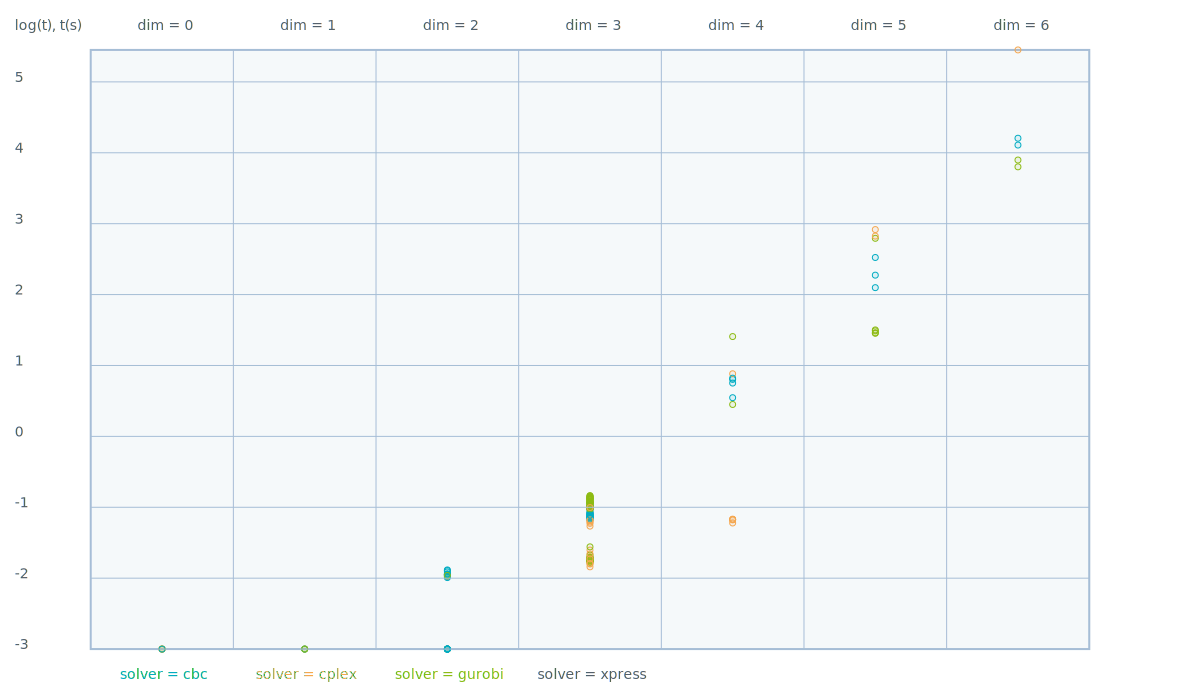

In [18]:
from IPython.core.display import SVG
SVG(filename='sudokuSolverTimes.svg')

Note that the solver versions pitched against each other here were CBC 2.9.7, CPLEX 12.6 and Gurobi 7.0.2.

We clearly see that for Sudoku dimensions of 0,1,2,3 times are below 1 second and so don't matter much. For the smaller problems of dimension 3 and 4, cplex is faster than CBC, which is faster than gurobi, but we are talking about times in the range: 0.01 to 25 seconds, which is not a long wait. For dimensions 5 and 6, gurobi becomes the fastest solver, then cbc and then cplex. So the order completely turns around. In this range we have solver times from 28 seconds to 282236 seconds (which is 3.26 days), so there waiting time starts to matter.

# Other Sudoku Related Ideas

An App on your phone that would recognize a Sudoku problem by camera, also recognize the filled in digits using some OCR and then immediately solve the problem and overlay the solution on screen in an Augmented Reality sense would not save the world, but still be really cool, right?! :)

We can very well solve Sudokus by computer now, but in fact Sudokus are created because some humans seem to derive pleasure from solving them with their natural brains. So depriving them from that satisfaction is not a very useful undertaking. Here, we have been reading Sudokus from a json file, but I generated them manually in a pretty much trial and error way. As for both human and computer generation of them, generation of random numbers for some random squares can lead to infeasible Sudoku problems. So clearly something smarter is needed. It could be enjoyable to dabble a bit into that. However, there are plenty to be found on the internet already. 

I also wonder how a technique like reinforcement learning could solve these discrete optimisation problems. We could have agents per constraint, each trying to satisfy their constraint, without coordination with any other agent. They would receive a reward if their constraint is satisfied or close to satisfied. Would that work? Or, due to the discrete nature of the problem, rather just keep oscillating and never converge to a valid solution? It sounds quite similar to decoupling a MILP approach into an ADMM approach, which also generally has no guarantees to converge to a solution when integer variables are contained in the problem. However, [2] argues it proves convergence for a special ADMM case it set up.

# References

[1] Sudoku Solving Algorithms, Wikipedia (https://en.wikipedia.org/wiki/Sudoku_solving_algorithms#Computation_time) <br>

[2] Baoyuan Wu, Bernard Ghanem, lp-Box ADMM: A Versatile Framework for Integer Programming. (https://arxiv.org/pdf/1604.07666.pdf)

Peter Sels, March 22nd, 2020. Copyright © 2020 Logically Yours BV.